# Installing tensorflow and keras

In [1]:
!pip install tensorflow==2.15.0
!pip install kaggle vit-keras tensorflow-addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 15.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.8 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.1.5
    Uninstalling typeguard-4.1.5:
      Successfully uninstalled typeguard-4.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-prof

# Installing libraries

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os
import numpy as np
from sklearn.metrics import classification_report
from vit_keras import vit
from sklearn.model_selection import train_test_split
import shutil

# Enable mixed precision training....FOr reduce memory usage and improve performance
tf.keras.mixed_precision.set_global_policy('mixed_float16')


2024-07-27 00:55:03.540765: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-27 00:55:03.540943: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-27 00:55:03.680373: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our Tens

# coppying files to another directoriies

In [3]:
import os
import shutil

# Base directory for the new structure
base_dir = '/kaggle/working/split_data'
all_dir = os.path.join(base_dir, 'all')
os.makedirs(all_dir, exist_ok=True)

# Paths to the original data directories
original_train_dir = os.path.join('/kaggle', 'input', 'Train')

# Copy the original training data into the new "all" directory
for category in ['TUBERCULOSIS', 'PNEUMONIA', 'NORMAL']:
    os.makedirs(os.path.join(all_dir, category), exist_ok=True)
    
    category_dir = os.path.join(original_train_dir, category)
    images = os.listdir(category_dir)
    
    for image in images:
        shutil.copy(os.path.join(category_dir, image), os.path.join(all_dir, category, image))

print("Images copied successfully!")


Images copied successfully!


# coppying files to another directoriies

In [4]:
import os
import shutil

# Base directory for the new structure
base_dir = '/kaggle/working/split_data'
all_dir = os.path.join(base_dir, 'all')
os.makedirs(all_dir, exist_ok=True)

# Paths to the original data directories
original_train_dir = os.path.join('/kaggle', 'input', 'Test')

# Copy the original training data into the new "all" directory
for category in ['TUBERCULOSIS', 'PNEUMONIA', 'NORMAL']:
    os.makedirs(os.path.join(all_dir, category), exist_ok=True)
    
    category_dir = os.path.join(original_train_dir, category)
    imagess = os.listdir(category_dir)
    
    for image in imagess:
        shutil.copy(os.path.join(category_dir, image), os.path.join(all_dir, category, image))

print("Images copied successfully!")


Images copied successfully!


# creating dorectories for train, test and val


In [5]:
#jekahne final merged dataset rakhbo tar location
# Create new directories for the split data
base_dir = '/kaggle/working/split_data'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')#newly add
#test_dir = os.path.join('/kaggle', 'input', 'chest-xray-pneumonia', 'chest_xray', 'test')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# splittig datainto train, test and val

In [6]:
# Paths to the original data directories
original_train_dir = os.path.join('/kaggle/working/split_data/all')#****train add korar jonno just ei line ta change krbo
# Split the original training data into new training and validation sets
for category in ['TUBERCULOSIS', 'PNEUMONIA','NORMAL']:#########train add korar jonno just ei line ta change krbo
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(val_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)#####newly addd
    category_dir = os.path.join(original_train_dir, category)
    images = os.listdir(category_dir)
    train_images, temp_images = train_test_split(images, test_size=0.3, random_state=42)
    test_images, val_images = train_test_split(temp_images, test_size=0.5, random_state=42)
    
    for image in train_images:
        shutil.copy(os.path.join(category_dir, image), os.path.join(train_dir, category, image))
    
    for image in val_images:
        shutil.copy(os.path.join(category_dir, image), os.path.join(val_dir, category, image))
        
    for image in test_images:
        shutil.copy(os.path.join(category_dir, image), os.path.join(test_dir, category, image))

# checking the number of images in a directory

In [7]:
import os

# Path to the test directory
test_dir = os.path.join('/kaggle/working/split_data/val')###############just ekhane directory dilei img koto ase show krbe
#test_dir='/kaggle/input/chest-xray-pneumonia/'
# Initialize a counter
image_count = 0

# Traverse the directory tree
for root, dirs, files in os.walk(test_dir):
    for file in files:
        # Check if the file is an image by its extension
        if file.lower().endswith(('.jpg','.png', '.jpeg', '.bmp', '.gif')):
            image_count += 1

print(f"Number of images in '{test_dir}': {image_count}")


Number of images in '/kaggle/working/split_data/val': 332


# creating data preprocessors

In [8]:
batch_size = 16



# Define input shape and number of classes
input_shape = (272, 272, 3)
num_classes = 3
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    #brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    preprocessing_function=preprocess_input
)
val_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=preprocess_input)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 1547 images belonging to 3 classes.
Found 332 images belonging to 3 classes.
Found 332 images belonging to 3 classes.


# for saveing and loading purpose

In [9]:
import pickle
import tensorflow as tf

class SaveHistory(tf.keras.callbacks.Callback):
    def __init__(self, filepath):
        super(SaveHistory, self).__init__()
        self.filepath = filepath

    def on_epoch_end(self, epoch, logs=None):
        # Save the history after each epoch
        with open(self.filepath, 'wb') as file_pi:
            pickle.dump(self.model.history.history, file_pi)


# the model architecture and model traing

Epoch 1/25
97/97 [==============================] - ETA: 0s - loss: 1.2048 - accuracy: 0.4111
Epoch 1: val_loss improved from inf to 1.19963, saving model to model_checkpoint.h5
97/97 [==============================] - 141s 1s/step - loss: 1.2048 - accuracy: 0.4111 - val_loss: 1.1996 - val_accuracy: 0.4307 - lr: 1.0000e-06
Epoch 2/25
97/97 [==============================] - ETA: 0s - loss: 1.1477 - accuracy: 0.5921
Epoch 2: val_loss improved from 1.19963 to 1.14336, saving model to model_checkpoint.h5
97/97 [==============================] - 98s 1s/step - loss: 1.1477 - accuracy: 0.5921 - val_loss: 1.1434 - val_accuracy: 0.5753 - lr: 1.0000e-06
Epoch 3/25
97/97 [==============================] - ETA: 0s - loss: 1.0752 - accuracy: 0.6606
Epoch 3: val_loss improved from 1.14336 to 1.07284, saving model to model_checkpoint.h5
97/97 [==============================] - 97s 1s/step - loss: 1.0752 - accuracy: 0.6606 - val_loss: 1.0728 - val_accuracy: 0.6506 - lr: 1.0000e-06
Epoch 4/25
97/97 [=

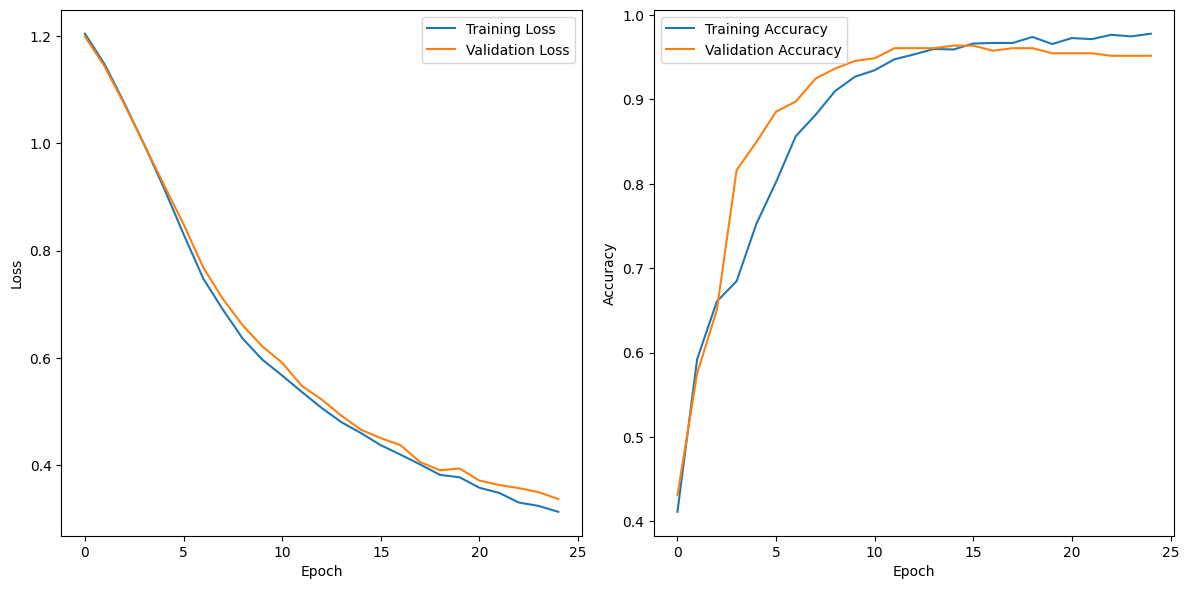

21/21 [==============================] - 10s 349ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       113
           1       0.99      0.89      0.94       114
           2       1.00      0.98      0.99       105

    accuracy                           0.95       332
   macro avg       0.96      0.95      0.95       332
weighted avg       0.96      0.95      0.95       332

Evaluation results:
  Loss: 0.3363
  Accuracy: 95.18%


In [15]:
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import pickle
import random
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'


# Define the ViT model
vit_model = vit.vit_b16(
    image_size=input_shape[0],
    activation='softmax',
    pretrained='imagenet',
    include_top=False,
    pretrained_top=False,
)
dropout_rate=0.1
# Add a new classification head
inputs = Input(shape=input_shape)
x = vit_model(inputs)
x = Flatten()(x)

x = Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4))(x)





predictions = Dense(num_classes, activation='softmax', dtype='float32')(x)

# Create the new model
model = Model(inputs=inputs, outputs=predictions)

# Set up the optimizer and compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-6)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])



# Set up the callbacks
checkpoint_callback = ModelCheckpoint(
    filepath='model_checkpoint.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    mode='min',
    verbose=1
)



# Set up the callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=4,
    min_lr=5e-9
)

# Custom callback to save history per epoch
save_history = SaveHistory(filepath='training_history.pkl')

# Train the model
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    callbacks=[checkpoint_callback, early_stopping, reduce_lr, save_history]
)
# Load and continue training as needed

# Save the history
with open('initial_history.pkl', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

# Plot learning curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator)

# Get the predicted labels for the test set
test_generator.reset()
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

# Get the true labels for the test set
y_true = test_generator.classes

# Compute the classification report (including precision, recall, F1-score)
classification_rep = classification_report(y_true, y_pred)
print("Classification Report:")
print(classification_rep)

print("Evaluation results:")
print(f"  Loss: {loss:.4f}")
print(f"  Accuracy: {accuracy:.2%}")
#l2=1e-5, batch=32, minlr=1e-6
#l2=1e-4, batch=16, , minlr=1e-5
#3

# testing the model

21/21 [==============================] - 8s 357ms/step - loss: 0.3363 - accuracy: 0.9518
Test Loss: 0.3363
Test Accuracy: 95.1807%
21/21 [==============================] - 8s 352ms/step
Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.88      0.99      0.93       113
   PNEUMONIA       0.99      0.89      0.94       114
TUBERCULOSIS       1.00      0.98      0.99       105

    accuracy                           0.95       332
   macro avg       0.96      0.95      0.95       332
weighted avg       0.96      0.95      0.95       332



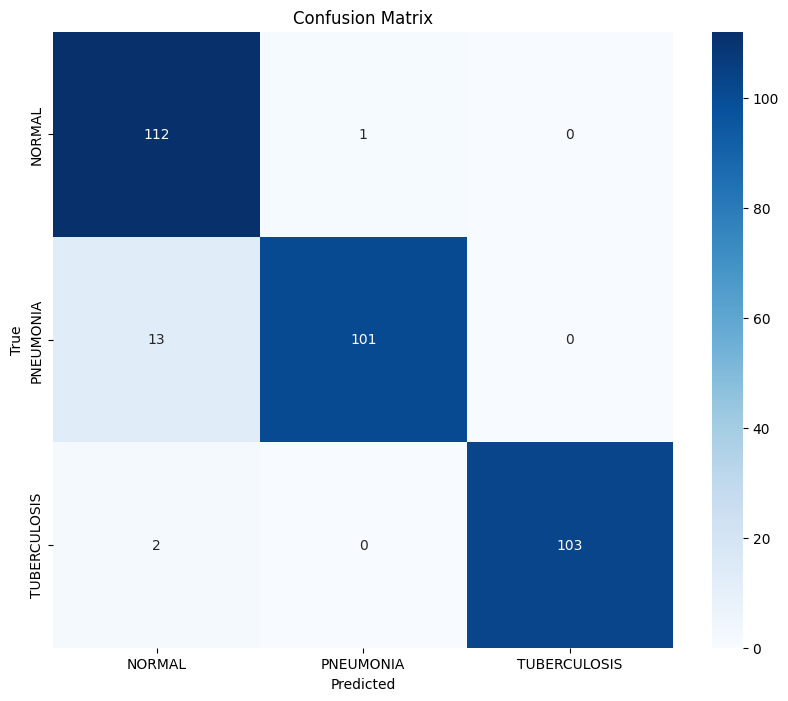

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4%}")

# Get the predicted labels for the test set
test_generator.reset()
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

# Get the true labels for the test set
y_true = test_generator.classes

# Compute the classification report (including precision, recall, F1-score)
class_indices = test_generator.class_indices
class_labels = list(class_indices.keys())
classification_rep = classification_report(y_true, y_pred, target_names=class_labels)
print("Classification Report:")
print(classification_rep)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



# Shap explanation

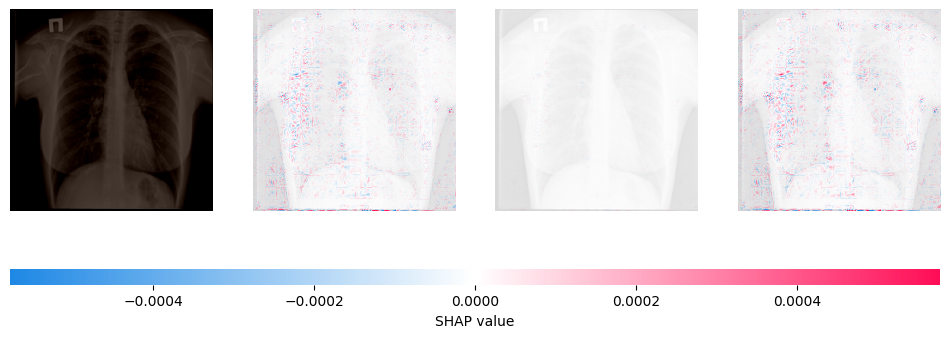

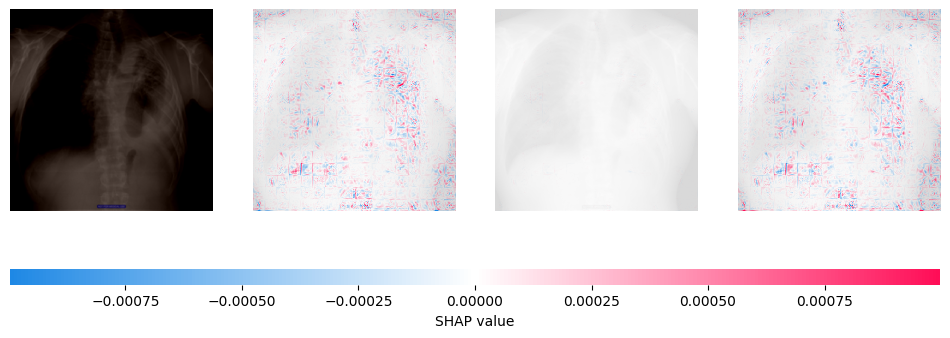

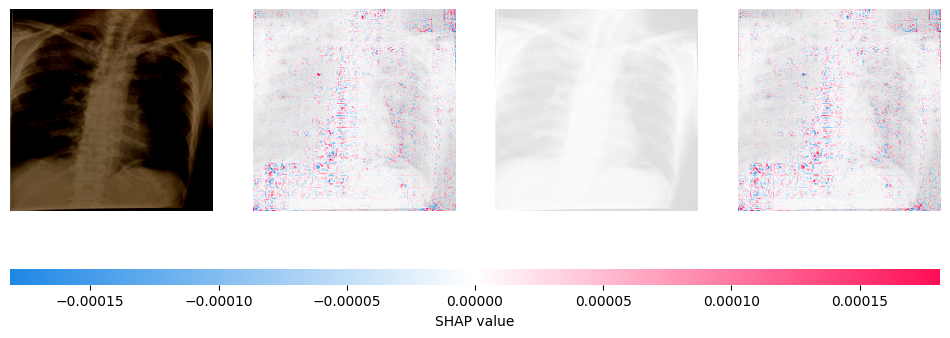

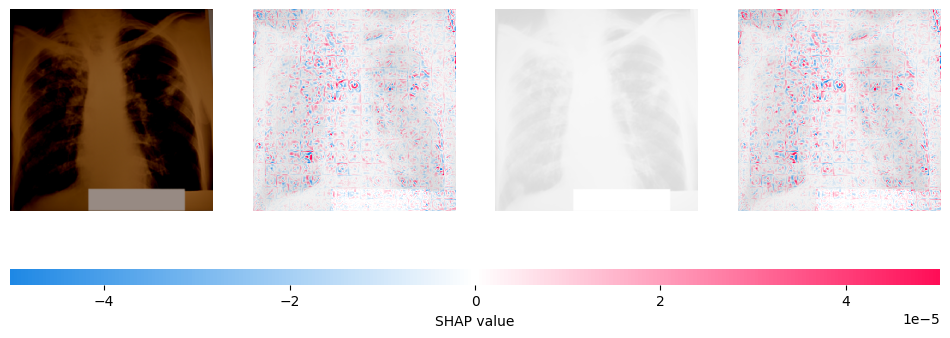

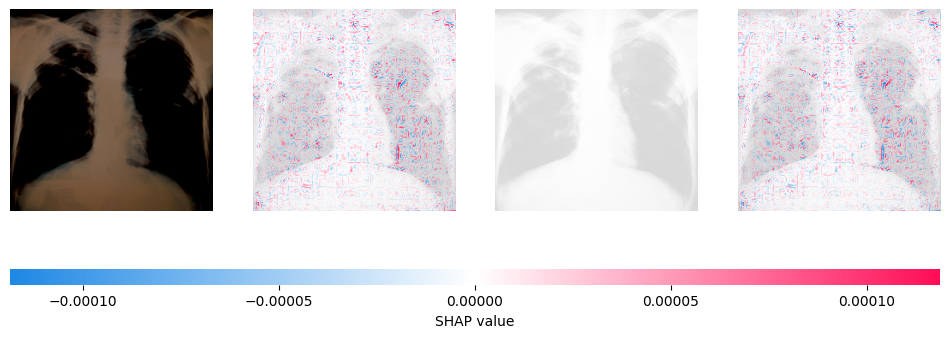

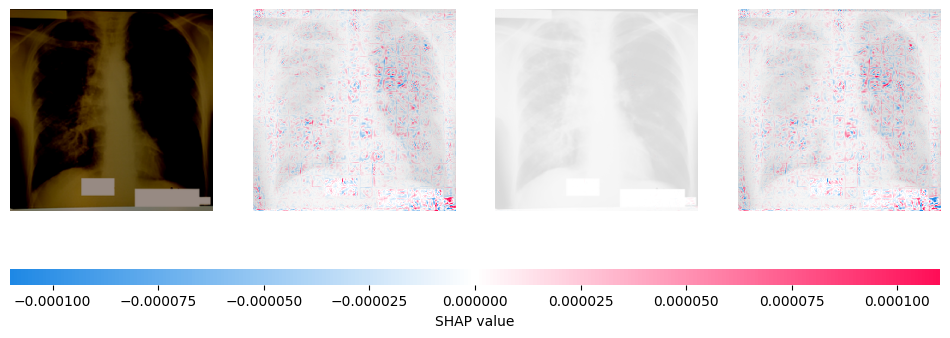

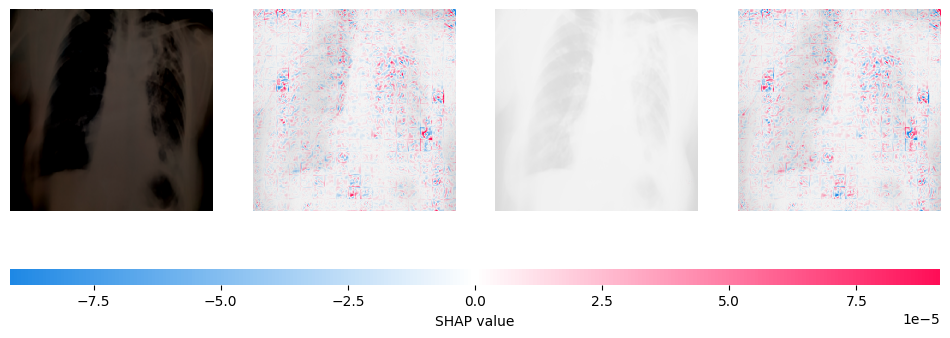

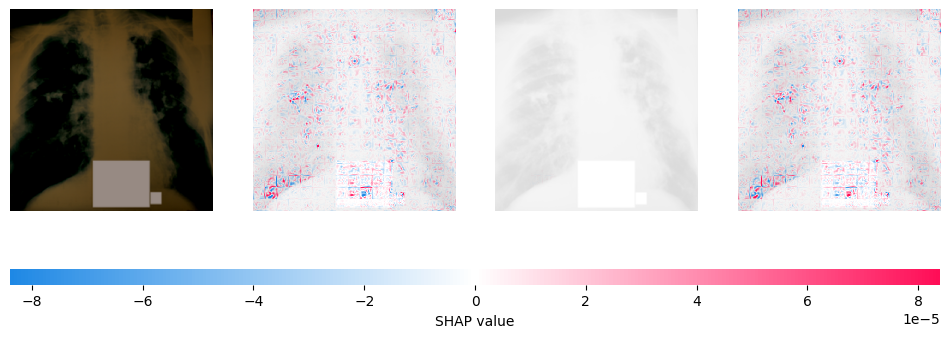

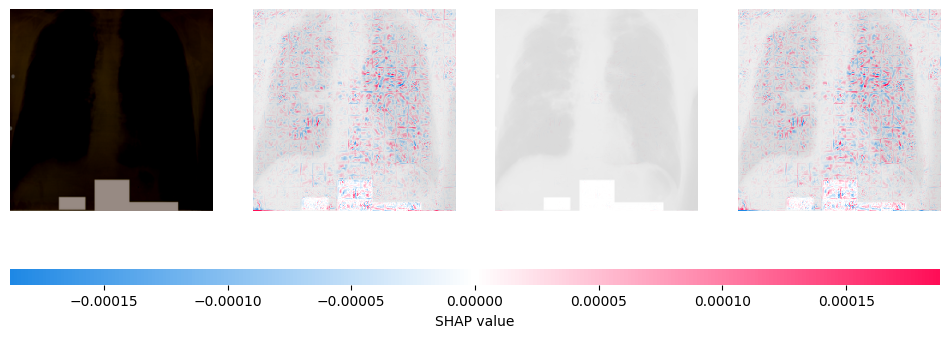

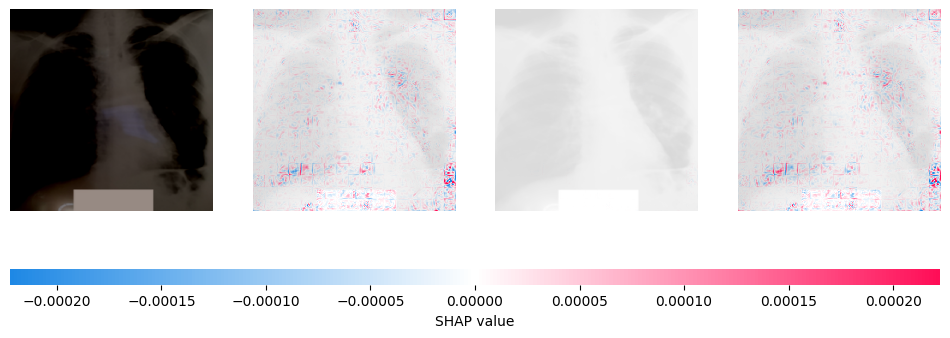

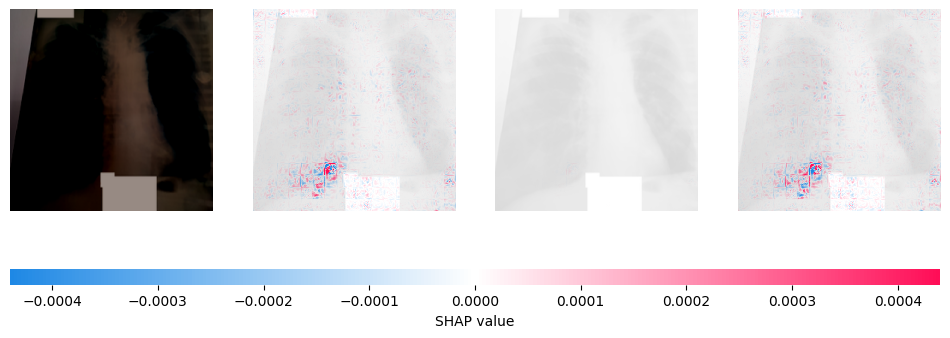

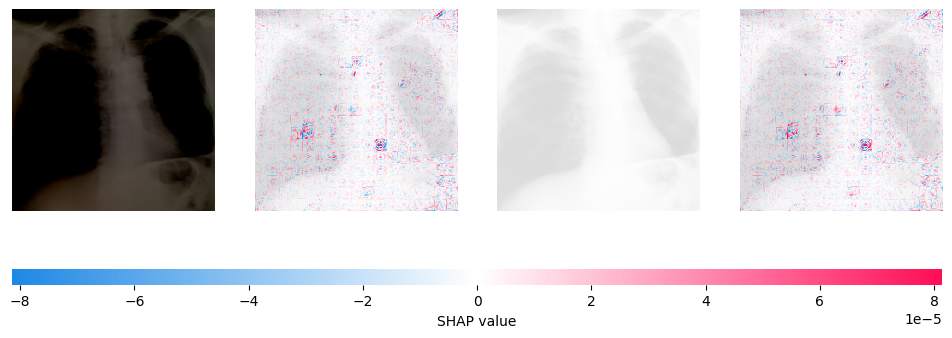

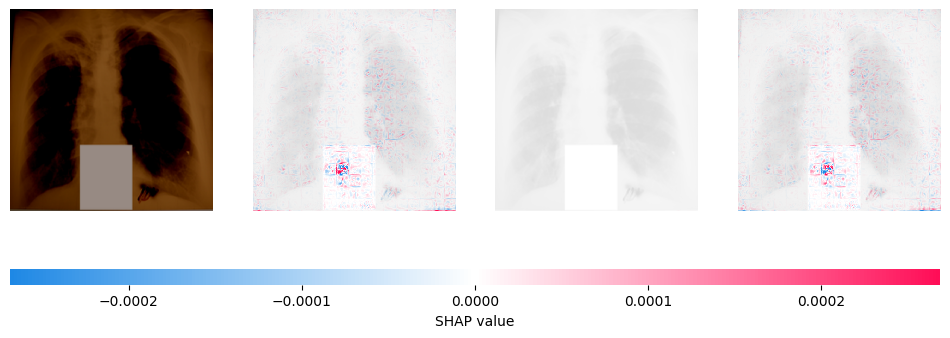

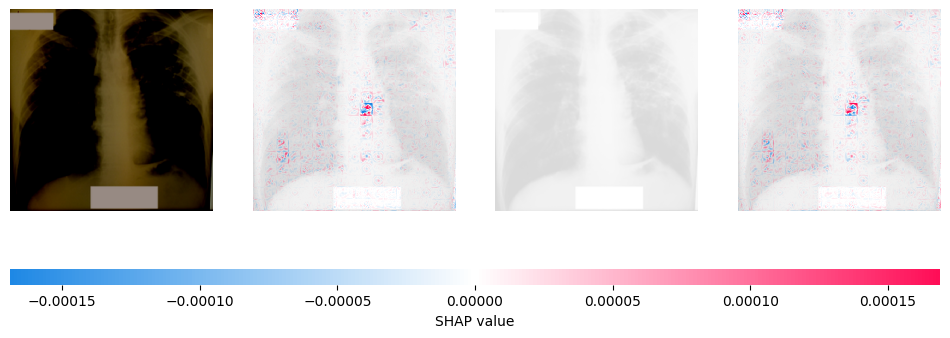

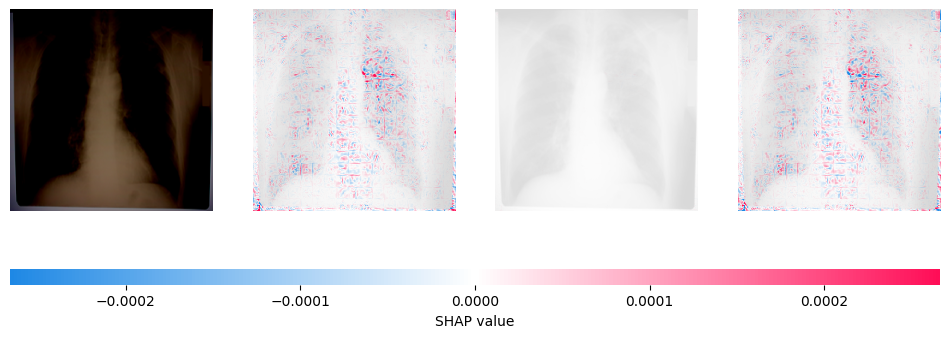

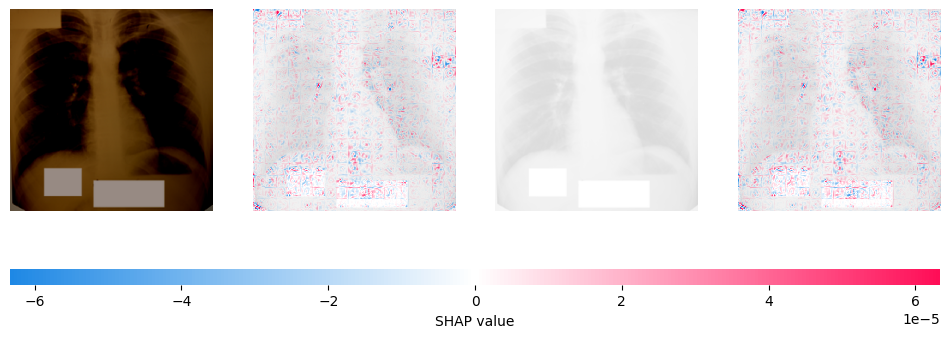

In [54]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Assuming the test_generator and model are already defined and loaded

# Skip the first 99 batches
for _ in range(99):
    val_generator.next()

# Take a batch of test data
X_test, y_test = next(val_generator)
X_test = X_test[:16]  # Take 2 samples for demonstration

# Create a SHAP explainer using the model
explainer = shap.GradientExplainer(model, X_test)
# Compute SHAP values
shap_values = explainer.shap_values(X_test)

# Visualize and save the SHAP values for each image in the batch
for i in range(len(X_test)):
    fig, ax = plt.subplots(figsize=(8, 8))  # Set the figure size to be square (8x8)
    shap.image_plot([shap_values[j][i] for j in range(len(shap_values))], np.squeeze(X_test[i:i+1]), show=False)
    plt.axis('off')  # Hide axes for a cleaner image
    plt.savefig(f'shap_plot_{i}.png', bbox_inches='tight', pad_inches=0, format='png', dpi=200)
    plt.close(fig)


# Lime explanation

In [55]:
pip install lime


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.


Note: you may need to restart the kernel to use updated packages.


1/1 [==============================] - 0s 60ms/step
Predicted class: NORMAL
Actual class: NORMAL


  0%|          | 0/3000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 152ms/step


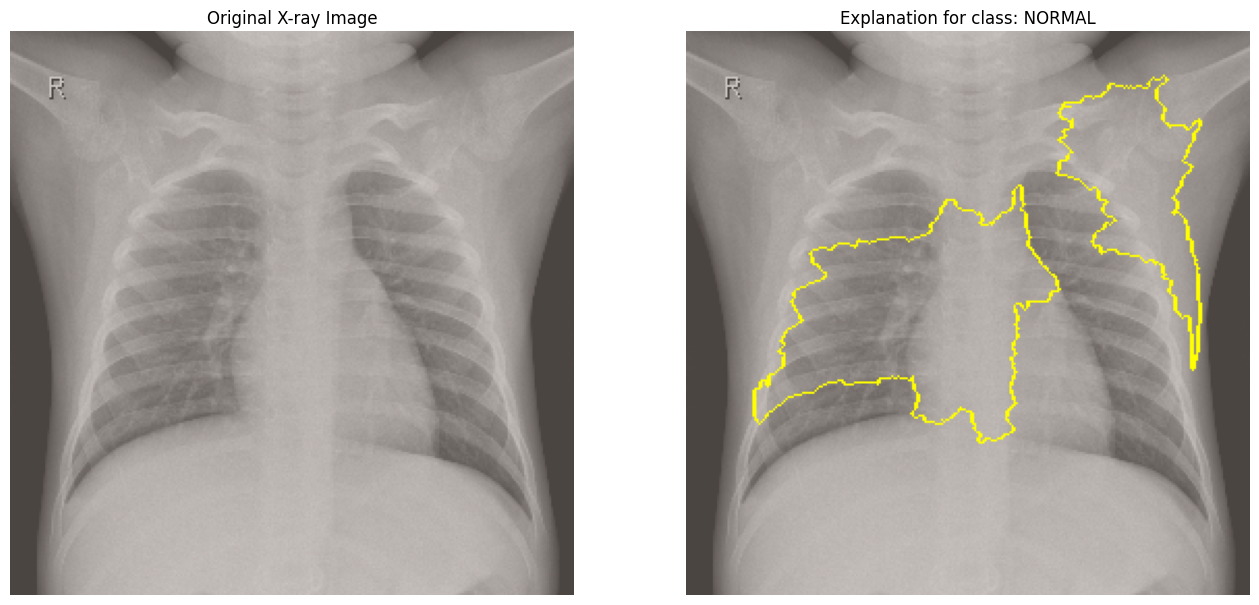

1/1 [==============================] - 0s 58ms/step
Predicted class: NORMAL
Actual class: NORMAL


  0%|          | 0/3000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 149ms/step


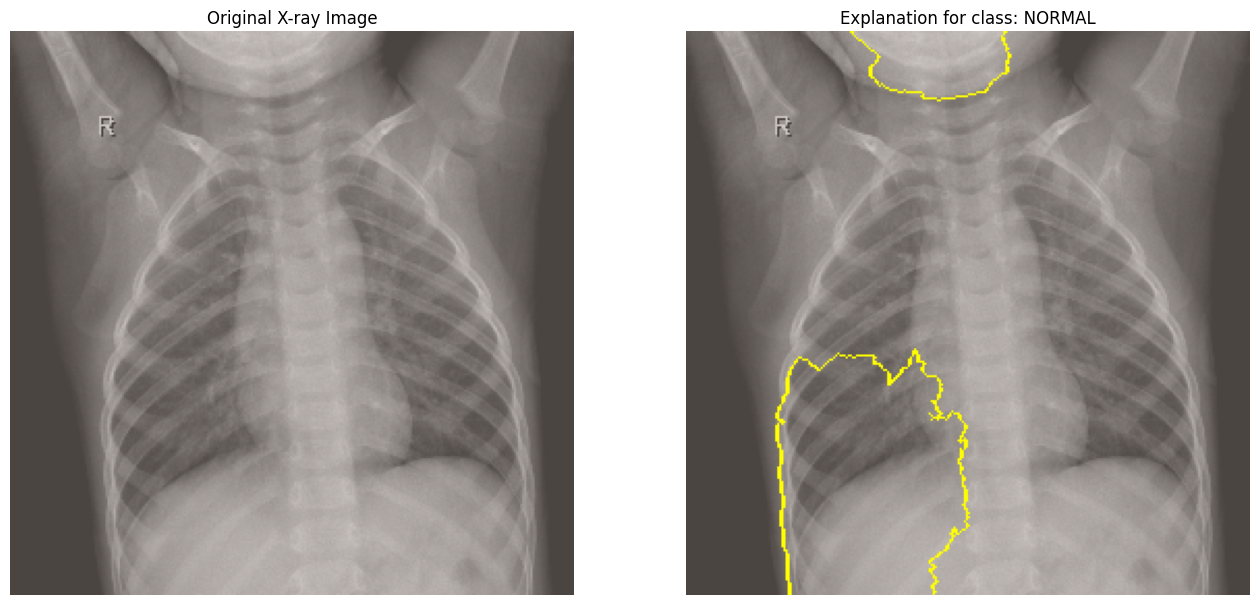

1/1 [==============================] - 0s 58ms/step
Predicted class: NORMAL
Actual class: NORMAL


  0%|          | 0/3000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 151ms/step


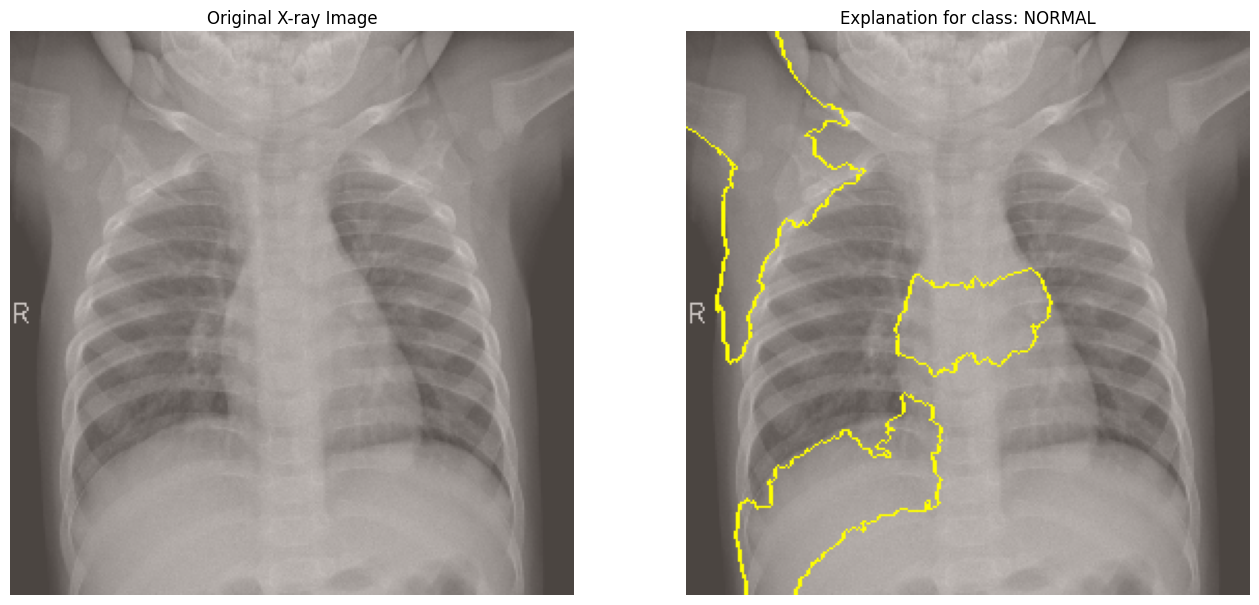

1/1 [==============================] - 0s 60ms/step
Predicted class: NORMAL
Actual class: NORMAL


  0%|          | 0/3000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 151ms/step


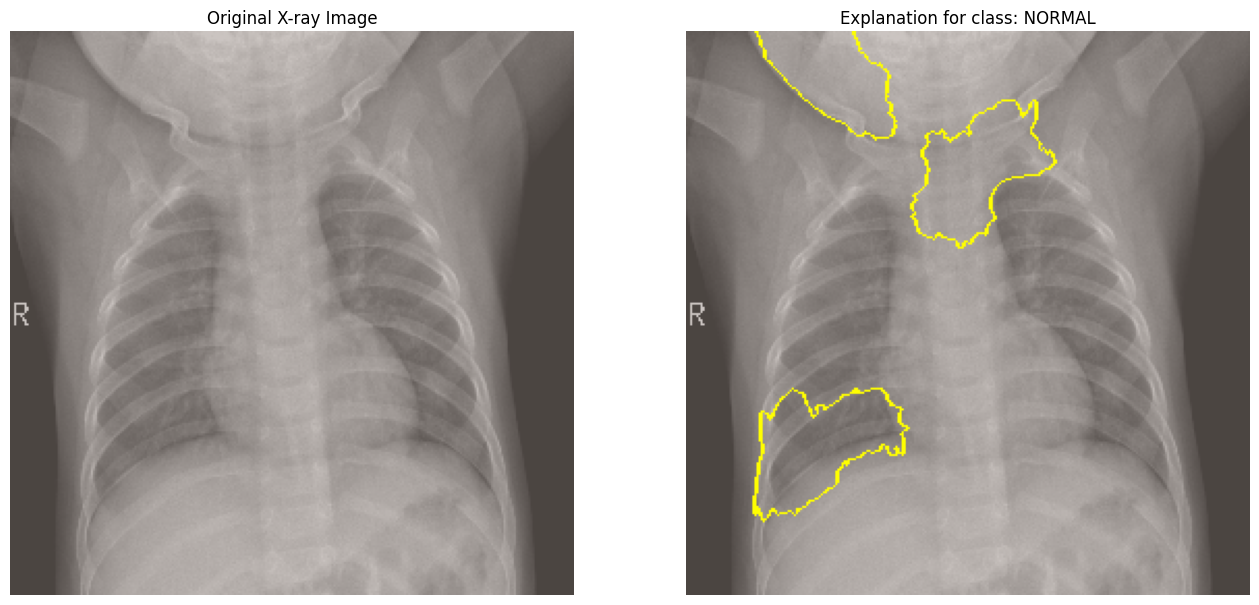

1/1 [==============================] - 0s 58ms/step
Predicted class: NORMAL
Actual class: NORMAL


  0%|          | 0/3000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 151ms/step


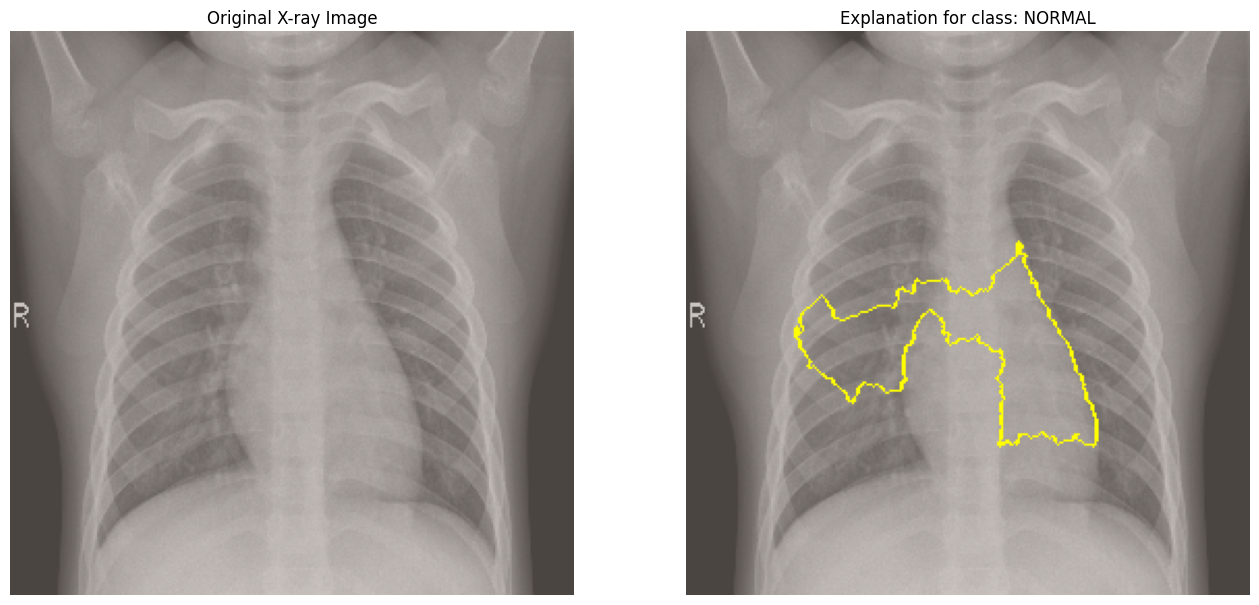

1/1 [==============================] - 0s 58ms/step
Predicted class: NORMAL
Actual class: NORMAL


  0%|          | 0/3000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 151ms/step


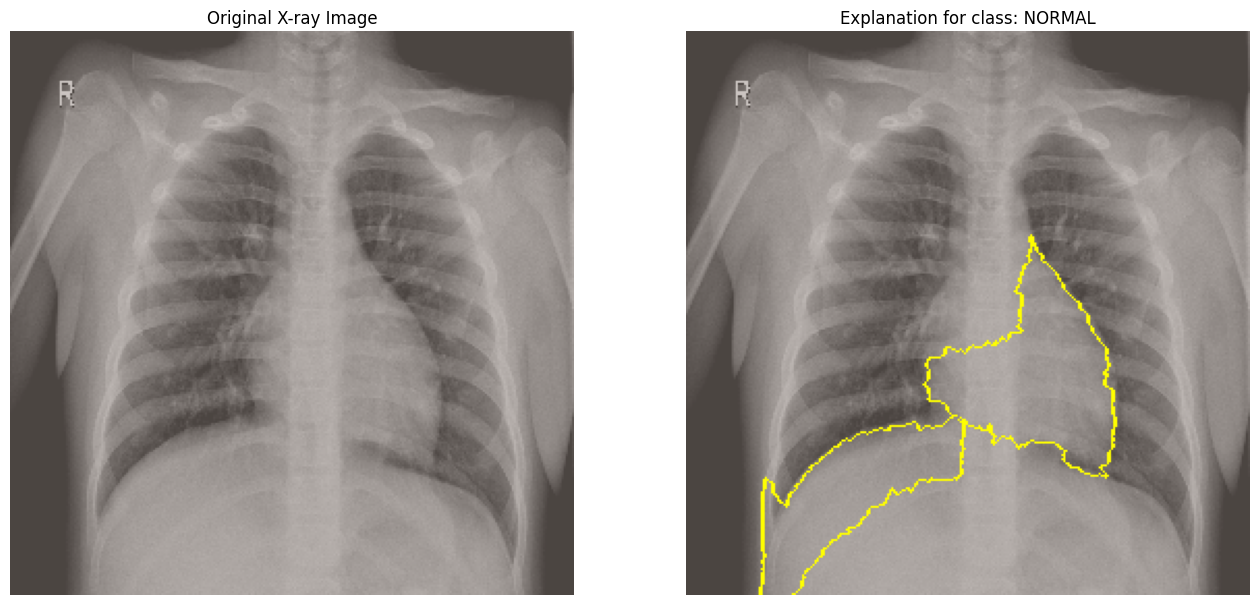

1/1 [==============================] - 0s 75ms/step
Predicted class: NORMAL
Actual class: NORMAL


  0%|          | 0/3000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 151ms/step


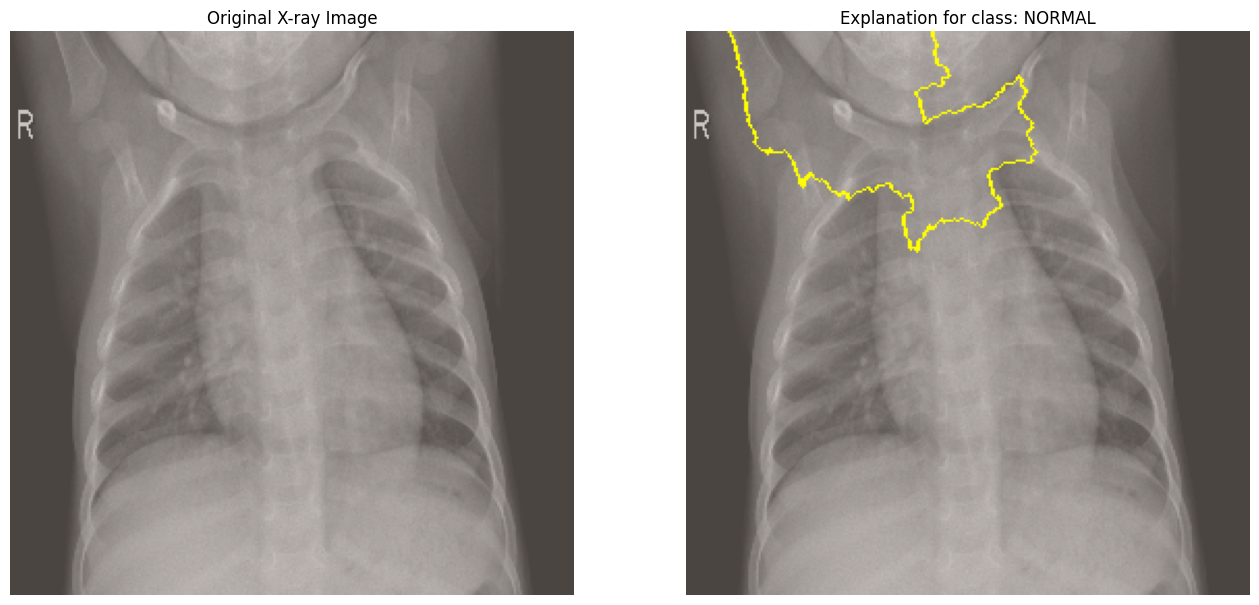

1/1 [==============================] - 0s 59ms/step
Predicted class: NORMAL
Actual class: NORMAL


  0%|          | 0/3000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 151ms/step


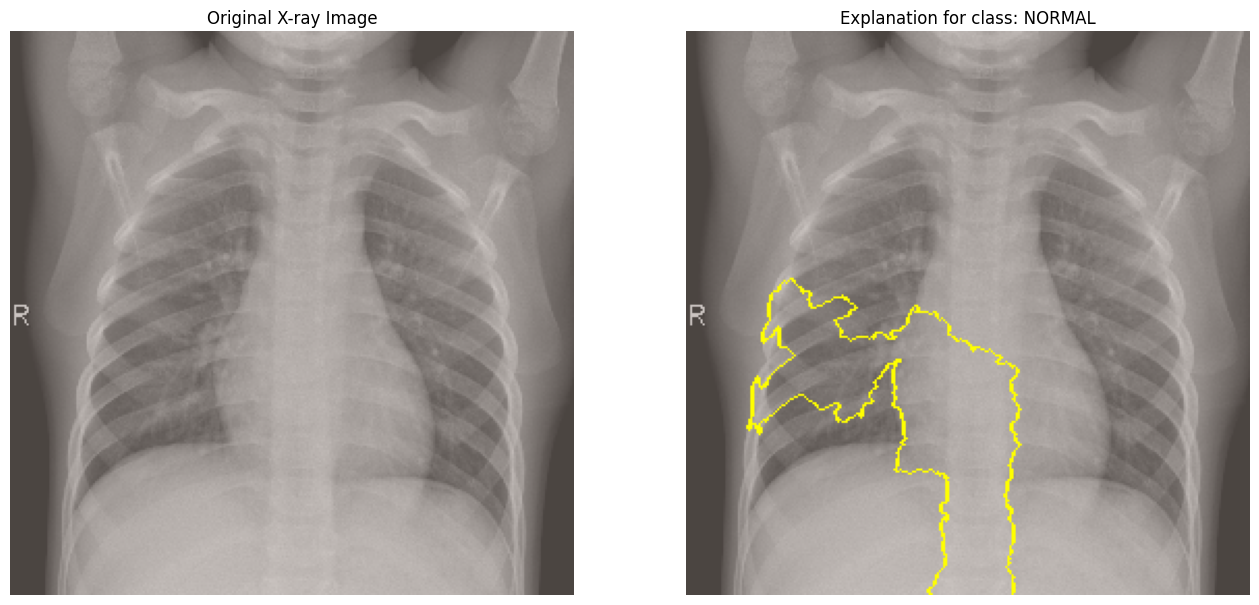

1/1 [==============================] - 0s 58ms/step
Predicted class: NORMAL
Actual class: NORMAL


  0%|          | 0/3000 [00:00<?, ?it/s]

1/1 [==============================] - ETA: 0s

In [ ]:
import numpy as np
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Function to get the class labels
class_labels = list(train_generator.class_indices.keys())

# Initialize the LIME explainer
explainer = lime_image.LimeImageExplainer()

# Function to make predictions
def predict_fn(images):
    images = np.array(images)
    return model.predict(images)

# Function to generate LIME explanation for a single image
def generate_lime_explanation(image_index, sample_image, sample_label):
    # Get the model's prediction for the sample image
    predictions = model.predict(np.expand_dims(sample_image, axis=0))
    predicted_class = np.argmax(predictions, axis=1)[0]
    predicted_class_label = class_labels[predicted_class]

    # Get the actual class label
    actual_class_label = class_labels[np.argmax(sample_label)]

    print(f"Predicted class: {predicted_class_label}")
    print(f"Actual class: {actual_class_label}")

    # Explain the prediction on the sample image
    explanation = explainer.explain_instance(
        sample_image.astype('double'),
        predict_fn,
        top_labels=3,
        hide_color=0,
        num_samples=3000  # Reduced for faster computation
    )

    # Get the explanation for the top predicted class
    temp, mask = explanation.get_image_and_mask(
        explanation.top_labels[0],
        positive_only=True,
        num_features=3,
        hide_rest=False
    )

    # Create a figure with two subplots in a row
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    
    # Original X-ray image
    axes[0].imshow(sample_image / 2 + 0.5)
    axes[0].set_title('Original X-ray Image')
    axes[0].axis('off')
    
    # LIME explanation
    axes[1].imshow(mark_boundaries(temp / 2 + 0.5, mask))
    axes[1].set_title(f'Explanation for class: {predicted_class_label}')
    axes[1].axis('off')

    # Save the figure as SVG
    svg_filename = f"lime_explanation_{predicted_class_label}_{image_index}.svg"
    plt.savefig(svg_filename, format='svg')
    plt.show()

# Skip the first 99 batches
for _ in range(99):
    val_generator.next()

# Load the 100th batch of images from the validation set
sample_images, sample_labels = val_generator.next()

# Generate explanations for each image in the 100th batch
for i in range(len(sample_images)):
    generate_lime_explanation(i, sample_images[i], sample_labels[i])
